## Ejercicio Time Series Forecast
Para este ejercicio vamos a predecir cuál será la demanda de pasajeros de una aerolinea, para poder anticiparse a las contrataciones de personal, mantenimiento de las aeronaves y gestión de inventario y comidas.

Para ello, se pide:
1. Carga datos (AirPassengers.csv) y representa la serie. ¿Hay seasonality? ¿Cada cuanto?
2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window con el valor de seasonality obtenido en el apartado anterior. Tienes que usar la función rolling() del DataFrame.
3. Comprueba de manera estadística si la serie es o no stationary.
4. Aplica una transformación logarítmica sobre los datos para mejorar el proceso de transformación de tu time series a stationary. Acuérdate después del forecast de invertir la transformación.
5. Divide en train y test. Guarda 20 muestras para test.
6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece el seasonality.
7. Representa en una gráfica los datos de test y tus predicciones.
8. Prueba un decission tree y un random forest, a ver qué performance presentan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## 1. Carga datos y representa la serie

In [2]:
df = pd.read_csv("data/AirPassengers.csv")
df.head()

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    144 non-null    datetime64[ns]
 1   value   144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [5]:
dates = pd.date_range(df['date'].min(),
              df['date'].max(),
              freq="MS")
dates


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

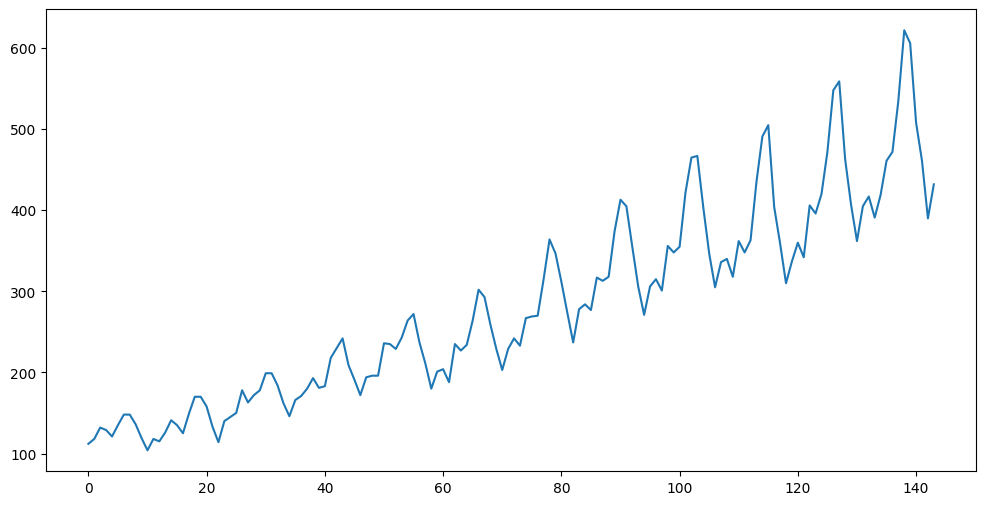

In [6]:
plt.figure(figsize=(12,6))
plt.plot(df['value']);

## 2. Crea en una gráfica la variable original + su media obtenida mediante una rolling window comparando el valor de seasonality obtenido en el apartado anterior

In [7]:
df['MA']= df['value'].rolling(5).mean()
df

,date,value,MA
0,1949-01-01,112,NaN
1,1949-02-01,118,NaN
2,1949-03-01,132,NaN
3,1949-04-01,129,NaN
4,1949-05-01,121,122.4
...,...,...,...
139,1960-08-01,606,539.2
140,1960-09-01,508,548.6
141,1960-10-01,461,546.4
142,1960-11-01,390,517.4


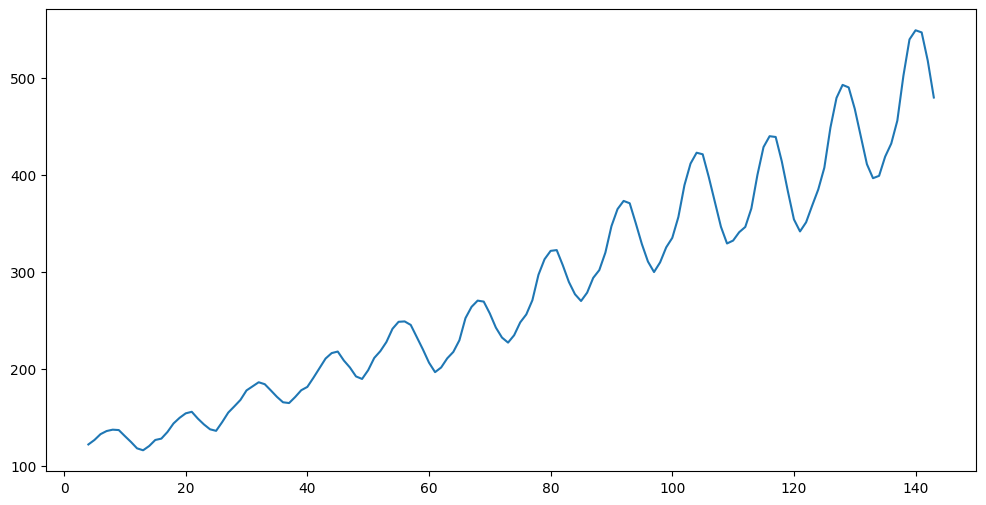

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df['MA']);

## 3. Comprueba de manera estadística si la serie es o no stationary.

In [9]:
from statsmodels.tsa.stattools import adfuller

adfuller = adfuller(df['value'].values)
adfuller[1]

0.9918802434376409

## 4. Aplica una transformación logarítmica

In [10]:
df['value'] = np.log(df['value'])

In [11]:
df.set_index(df['date'], inplace=True, drop=True)

In [12]:
df.drop(columns=['date', 'MA'], inplace=True)

In [13]:
df

,value
date,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


## 5. Divide en train y test. Guarda 20 muestras para test.

In [14]:
train = df['value'][0:124]
test = df['value'][124:]

In [15]:
print(train.shape)
print(test.shape)

(124,)
(20,)


## 6. Crea tu primer modelo ARIMA. Habrá varias combinaciones en función de sus hiperparámetros... Mide el MAE y RMSE del modelo en predicción. Ten en cuenta el parámetro "m" de la función ARIMA, mediante el cual se establece 

In [16]:
from pmdarima.arima import auto_arima, ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [20]:
model = auto_arima(train,
                   start_p = 1,
                   start_q = 1,
                   max_d = 3,
                   max_p = 5,
                   max_q = 5,
                   m=12,
                   stationary = False,
                   trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=-409.460, Time=1.19 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-290.649, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-399.417, Time=0.74 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-353.179, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-125.472, Time=0.02 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=-411.631, Time=0.68 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=-384.170, Time=0.09 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=-409.712, Time=2.24 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=-405.268, Time=1.01 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=-408.107, Time=2.11 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-408.087, Time=0.68 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=-410.745, Time=1.39 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-409.957, Time=1.38 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-300.825, Time=0.31 sec
 ARIMA(0,0,2)(0,1,1

In [21]:
y_pred = model.predict(20)

In [22]:
#Verificamos los resultados
print("MSE:", mean_squared_error(test.values, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(test.values, y_pred)))
print("MAE:", mean_absolute_error(test.values, y_pred))

MSE: 0.001448887224033837
RMSE: 0.03806425126064924
MAE: 0.02700969763528054


## 7. Representa en una gráfica los datos de test y tus predicciones.

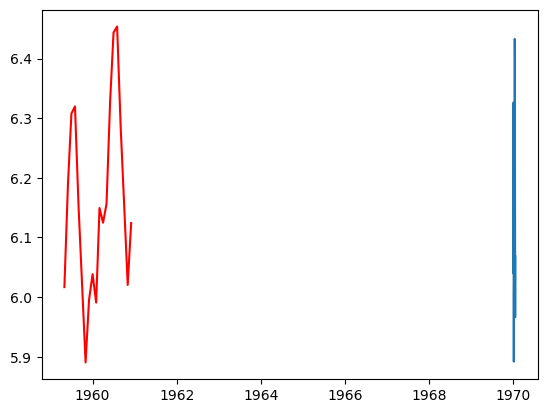

In [23]:
plt.plot(test.values)
plt.plot(y_pred, color='red');

## 8. Prueba otros modelos, a ver qué performance presentan.